# Introduction to Data Science 
# Lecture 4: Introduction to Descriptive Statistics
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

In this lecutre, we'll cover 
- variable types 
- descriptive statistics in python (min, max, mean, median, std, var, histograms, quantiles) 
- correlation vs causation
- confounding variables 
- introduction to probability 


## Variable types

- **Categorical**: Unordered variables 
- **Real variables**: have real values, but can have different

## Levels of measurement
- **Ordinal**: There is an ordering but no implication of equal distance between the different points of the scale. 
- **Interval**: There are equal differences between successive points on the scale but the position of zero is arbitrary. 
- **Ratio**: The relative magnitudes of scores and the differences between them matter. The position of zero is fixed. 

## Categorical variables
Unordered variables 

Examples: 
- Survey responses: sex (M/F), true or false (T/F), yes or no (Y/N) 
- size: S/M/L/XL 
- color: red, blue, green, etc.


## Ordinal Variables
There is an ordering but no implication of equal distance between the different points of the scale. 


Examples:
- educational level (high school, some college, degree, graduate…) 
- on Likert scale of 1 to 5, how satisfied are you with your instructor? 
- social class (lower, middle, upper) 

<img src="OrdinalVariables.png"/>


## Interval Variables 
There are equal differences between successive points on the scale but the position of zero is arbitrary.

Examples:
- Measurement of temperature using the Celsius or Fahrenheit scales.
- Longitude 

<img src="Thermometer_CF.png" alt="https://en.wikipedia.org/wiki/Fahrenheit#/media/File:Thermometer_CF.svg"/>


## Ratio Variables
The relative magnitudes of scores and the differences between them matter. The position of zero is fixed.

Examples:
- Absolute measure of temperature (Kelvin scale) 
- Age
- Weight
- Length

<img src="Ruler.png" width="50%"  alt="https://commons.wikimedia.org/wiki/File:Metre_pliant_500px.png"/>


## Quiz!

What type of variable (Nominal, Ordinal, Interval, or Ratio)  are the following:
1. Olympic 50 meter race times
2. Olympic floor gymnastics score
3. College major
4. Olympic high jump
5. Amazon rating for a product

Can you think of another example of an interval variable? 

## Descriptive Statistics

The goal is to describe a dataset with a small number of statistics or figures  

Suppose we are given a sample, $x_1, x_2, \ldots, x_n$ of real values 

Some *descriptive statitsics* for this data are the min, max, median, and mean, $\frac{1}{n} \sum_{i=1}^n x_i$

How do we find these using python? 


In [1]:
# First import python packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Alta monthly average snowfall, October - April
compiled using data from 1980 to 2014 <br>
https://www.alta.com/conditions/weather-observations/snowfall-history

In [2]:
Alta_avg_month_snow = [28.50,76.77,92.00,95.40,90.85,99.66,80.00]

# this is a list of floats
print(type(Alta_avg_month_snow))
print(type(Alta_avg_month_snow[0]))

<class 'list'>
<class 'float'>


In [3]:
# how many months data do we have?
len(Alta_avg_month_snow)

7

In [4]:
# compute the min and max
np.min(Alta_avg_month_snow),np.max(Alta_avg_month_snow)

(28.5, 99.659999999999997)

In [5]:
# what month do these correspond to? 
imin = np.argmin(Alta_avg_month_snow)
imax = np.argmax(Alta_avg_month_snow)
months = ['Oct','Nov','Dec','Jan','Feb','March','Apr']
months[imin], months[imax]

('Oct', 'March')

In [6]:
# compute the mean
np.mean(Alta_avg_month_snow)

80.454285714285703

In [7]:
# compute the median
np.median(Alta_avg_month_snow)

90.849999999999994

## Data from the 1994 census

import data from the following dataset <br>
https://archive.ics.uci.edu/ml/datasets/Adult

In [8]:
# use pandas to import a table of data from a website
data = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", sep=",", 
                  names=("age", "type_employer", "fnlwgt", "education", "education_num", "marital", 
                         "occupation", "relationship", "race","sex","capital_gain", "capital_loss", 
                         "hr_per_week","country", "income"))
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [9]:
# export a list containing ages of people in 1994 Census
ages = data["age"].tolist()

In [10]:
print(len(ages))
print(np.min(ages))
print(np.max(ages))
print(np.mean(ages))
print(np.median(ages))

32561
17
90
38.5816467553
37.0


# Histograms

We might also want to make plots that describe a dataset <br>
After all, a picture is worth a thousand words

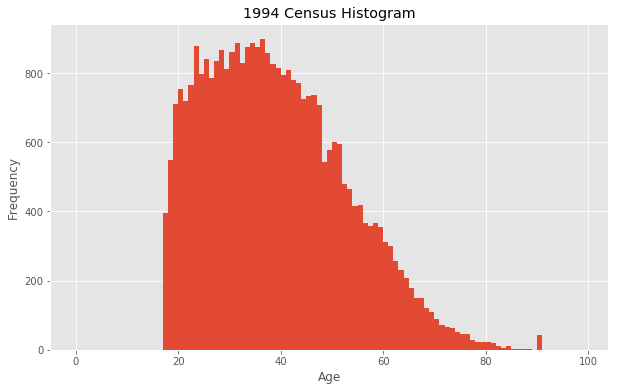

In [11]:
p = plt.hist(ages,np.arange(0,100))
plt.title("1994 Census Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


# Quantiles 
Quantiles describe what percentage of the observations in a sample have smaller value


In [12]:
np.percentile(ages,25), np.percentile(ages,75)

(28.0, 48.0)

For this data, 25% of the people are under 28 years old

The middle 50% of the data (the data between the 25% and 75% quantiles) is between 28 and 48 years old 

**Question**: how do I read off quantiles from a histogram? 

# Variation and Standard Deviation

Variance and standard deviation quantify the amount of variation or dispersion of a set of data values.

Mean, $\mu = \frac{1}{n} \sum_{i = 1}^n x_i$ <br>
Variance $= \sigma^2   = \frac{1}{n} \sum_{i = 1}^n (x_i - \mu)^2$ <br>
Std. dev. $= \sigma$


In [13]:
print(np.var(ages))
print(np.std(ages))

186.055686008
13.6402230923


In terms of the histogram,...
<img src="SmallLargeStandDev.png" width="50%"  alt="https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg">



## Covariance and Correlation
Covariance and correlation measure of how much two variables change together.

$cov(x,y) = \frac{1}{n} \sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)$ 

$\mu_x$ is mean of $x_i$ <br>
$\mu_y$ is mean of $x_i$

$corr(x,y) = \frac{cov(X,Y)}{\sigma_x \sigma_y}$

$\sigma_x$ is std. dev. of $x_i$ <br>
$\sigma_y$ is std. dev. of $y_i$

Correlations for various pairs of variables:
<img src="Correlation_examples2.svg" width="90%"  alt="https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg">





## Correlation vs Causation

<img src="correlation.png" width="100%"  alt="https://xkcd.com/552/">




## Spurious Correlations I (www.tylervigen.com)

<img src="Conf1.png" width="90%"  alt="www.tylervigen.com">



## Spurious Correlations II (www.tylervigen.com)

<img src="Conf2.png" width="90%" alt="www.tylervigen.com">


## Confounding: example

Suppose we are given city statistics covering a four-month summer period, and observe that swimming pool deaths tend to increase on days when more ice cream is sold. 

Should we conclude that ice cream is the killer? 

## Confounding: example cont.

No! 

As astute analysts, we identify average daily temperature as a confounding variable: on hotter days, people are more likely to both buy ice cream and visit swimming pools. 

Regression methods can be used to statistically control for this confound, eliminating the direct relationship between ice cream sales and swimming pool deaths.

<br> <br> <br> <br> 
source: doi:10.1371/journal.pone.0152719 


## Descriptive vs. Inferential Statistics 

Descriptive statistics quantitatively describe or summarize features of a dataset. 

Inferential statistics attempts to learn about the population that the sample of data is thought to represent.

## Looking Ahead: 

hypothesis testing